In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2


file_name = 'waiting_every5_2.csv'

In [2]:
df = pd.read_csv(file_name)
df = df.dropna(subset="Steps") # drop passenger agents
df

,RunId,iteration,Step,num_cars,width,height,multi_pass,seed_int,strategy,Manhattan,AgentID,Steps,IdleTime,request_time,pickup_time,dropoff_time
1,0,0,0,1,10,10,False,11,StepType.CLOSEST,0,2,-1.0,0.0,NaN,NaN,NaN
3,0,0,1,1,10,10,False,11,StepType.CLOSEST,0,2,0.0,0.0,NaN,NaN,NaN
5,0,0,2,1,10,10,False,11,StepType.CLOSEST,0,2,1.0,0.0,NaN,NaN,NaN
7,0,0,3,1,10,10,False,11,StepType.CLOSEST,0,2,2.0,0.0,NaN,NaN,NaN
9,0,0,4,1,10,10,False,11,StepType.CLOSEST,0,2,2.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6150346,449,4,2000,5,10,10,False,221,StepType.QUEUE,0,6,1028.0,902.0,NaN,NaN,NaN
6150347,449,4,2000,5,10,10,False,221,StepType.QUEUE,0,7,996.0,923.0,NaN,NaN,NaN
6150348,449,4,2000,5,10,10,False,221,StepType.QUEUE,0,8,1042.0,883.0,NaN,NaN,NaN
6150349,449,4,2000,5,10,10,False,221,StepType.QUEUE,0,9,1018.0,902.0,NaN,NaN,NaN


In [3]:
steps = df[df["Step"] == 2000]
display(steps)

,RunId,iteration,Step,num_cars,width,height,multi_pass,seed_int,strategy,Manhattan,AgentID,Steps,IdleTime,request_time,pickup_time,dropoff_time
11335,0,0,2000,1,10,10,False,11,StepType.CLOSEST,0,2,1988.0,1.0,NaN,NaN,NaN
23786,1,0,2000,1,10,10,False,11,StepType.WAITING,0,2,316.0,1.0,NaN,NaN,NaN
36348,2,0,2000,1,10,10,False,11,StepType.QUEUE,0,2,1991.0,2.0,NaN,NaN,NaN
47642,3,0,2000,1,10,10,False,111,StepType.CLOSEST,0,2,1993.0,0.0,NaN,NaN,NaN
60087,4,0,2000,1,10,10,False,111,StepType.WAITING,0,2,127.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6150346,449,4,2000,5,10,10,False,221,StepType.QUEUE,0,6,1028.0,902.0,NaN,NaN,NaN
6150347,449,4,2000,5,10,10,False,221,StepType.QUEUE,0,7,996.0,923.0,NaN,NaN,NaN
6150348,449,4,2000,5,10,10,False,221,StepType.QUEUE,0,8,1042.0,883.0,NaN,NaN,NaN
6150349,449,4,2000,5,10,10,False,221,StepType.QUEUE,0,9,1018.0,902.0,NaN,NaN,NaN


In [4]:
groups = steps.groupby(["num_cars", "strategy"])
steps_av = groups.mean()
display(steps_av)

RunId  iteration    Step  width  height  \
num_cars strategy                                                    
1        StepType.CLOSEST  187.5        2.0  2000.0   10.0    10.0   
         StepType.QUEUE    189.5        2.0  2000.0   10.0    10.0   
         StepType.WAITING  188.5        2.0  2000.0   10.0    10.0   
2        StepType.CLOSEST  205.5        2.0  2000.0   10.0    10.0   
         StepType.QUEUE    207.5        2.0  2000.0   10.0    10.0   
         StepType.WAITING  206.5        2.0  2000.0   10.0    10.0   
3        StepType.CLOSEST  223.5        2.0  2000.0   10.0    10.0   
         StepType.QUEUE    225.5        2.0  2000.0   10.0    10.0   
         StepType.WAITING  224.5        2.0  2000.0   10.0    10.0   
4        StepType.CLOSEST  241.5        2.0  2000.0   10.0    10.0   
         StepType.QUEUE    243.5        2.0  2000.0   10.0    10.0   
         StepType.WAITING  242.5        2.0  2000.0   10.0    10.0   
5        StepType.CLOSEST  259.5        2.0  2000.0   10.0    10.0   
         StepType.QUEUE    261.5        2.0  2000.0   10.0    10.0   
         StepType.WAITING  260.5        2.0  2000.0   10.0    10.0   

                           multi_pass    seed_int  Manhattan  AgentID  \
num_cars strategy                                                       
1        StepType.CLOSEST         0.0  117.166667        0.0      2.0   
         StepType.QUEUE           0.0  117.166667        0.0      2.0   
         StepType.WAITING         0.0  117.166667        0.0      2.0   
2        StepType.CLOSEST         0.0  117.166667        0.0      3.5   
         StepType.QUEUE           0.0  117.166667        0.0      3.5   
         StepType.WAITING         0.0  117.166667        0.0      3.5   
3        StepType.CLOSEST         0.0  117.166667        0.0      5.0   
         StepType.QUEUE           0.0  117.166667        0.0      5.0   
         StepType.WAITING         0.0  117.166667        0.0      5.0   
4        StepType.CLOSEST         0.0  117.166667        0.0      6.5   
         StepType.QUEUE           0.0  117.166667        0.0      6.5   
         StepType.WAITING         0.0  117.166667        0.0      6.5   
5        StepType.CLOSEST         0.0  117.166667        0.0      8.0   
         StepType.QUEUE           0.0  117.166667        0.0      8.0   
         StepType.WAITING         0.0  117.166667        0.0      8.0   

                                 Steps    IdleTime  request_time  pickup_time  \
num_cars strategy                                                               
1        StepType.CLOSEST  1964.800000    0.333333           NaN          NaN   
         StepType.QUEUE    1996.866667    0.233333           NaN          NaN   
         StepType.WAITING  1053.933333    0.366667           NaN          NaN   
2        StepType.CLOSEST  1976.116667   10.733333           NaN          NaN   
         StepType.QUEUE    1985.650000    6.100000           NaN          NaN   
         StepType.WAITING  1552.900000    1.333333           NaN          NaN   
3        StepType.CLOSEST  1707.177778  216.977778           NaN          NaN   
         StepType.QUEUE    1715.066667  210.988889           NaN          NaN   
         StepType.WAITING  1719.744444  206.566667           NaN          NaN   
4        StepType.CLOSEST  1301.541667  609.116667           NaN          NaN   
         StepType.QUEUE    1303.158333  607.241667           NaN          NaN   
         StepType.WAITING  1308.266667  602.425000           NaN          NaN   
5        StepType.CLOSEST  1049.106667  875.213333           NaN          NaN   
         StepType.QUEUE    1048.993333  875.486667           NaN          NaN   
         StepType.WAITING  1049.940000  874.966667           NaN          NaN   

                           dropoff_time  
num_cars strategy                        
1        StepType.CLOSEST           NaN  
         StepType.QUEUE             NaN  
         StepType.WAITING           NaN  
2     

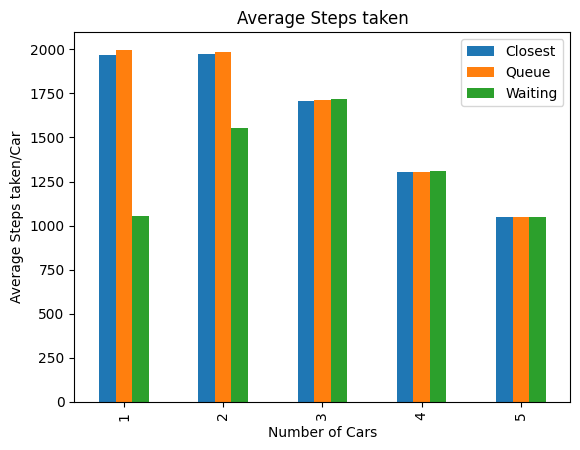

In [7]:
unstacked = steps_av.unstack()


ax = unstacked["Steps"].plot(kind="bar", stacked=False)
ax.legend(['Closest', 'Queue', "Waiting"])


plt.xlabel('Number of Cars')
plt.ylabel('Average Steps taken/Car')
plt.title('Average Steps taken')
plt.savefig('figures/total_steps.png')
